# Model Validation

# I. Model Capacity

* import Packages

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

* Colab File Upload
 - Electric.csv & Cars.csv

In [2]:
from google.colab import files

uploaded = files.upload()

Saving Cars.csv to Cars.csv
Saving Electric.csv to Electric.csv


* pandas DataFrame

In [3]:
Elec = pd.read_csv('Electric.csv')

Elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
compactness                  768 non-null float64
surface_area                 768 non-null float64
wall_area                    768 non-null float64
roof_area                    768 non-null float64
height                       768 non-null float64
orientation                  768 non-null int64
glazing_area                 768 non-null float64
glazing_area_distribution    768 non-null int64
electricity                  768 non-null float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


* 산점도(surface_area vs. electricity)

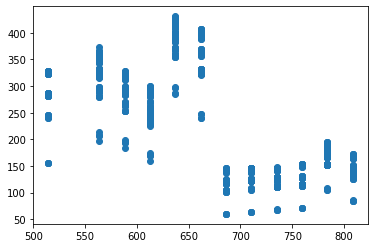

In [4]:
plt.scatter(Elec.surface_area, Elec.electricity)
plt.show()

> ## 1) 1차 모델 시각화

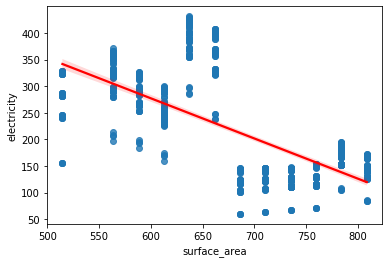

In [5]:
sns.regplot(x = 'surface_area', y = 'electricity', data = Elec,
            line_kws = {'color':'red'})
plt.show()

> ## 2) 2차 모델 시각화

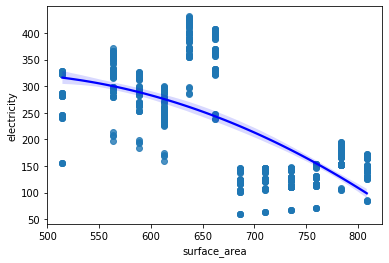

In [6]:
sns.regplot(x = 'surface_area', y = 'electricity', data = Elec,
            line_kws = {'color':'blue'},
            order = 2)
plt.show()

> ## 3) 5차 모델 시각화

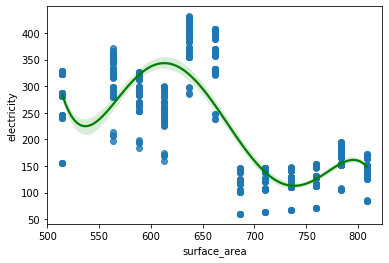

In [7]:
sns.regplot(x = 'surface_area', y = 'electricity', data = Elec,
            line_kws = {'color':'green'},
            order = 5)
plt.show()

> ## 4) 9차 모델 시각화

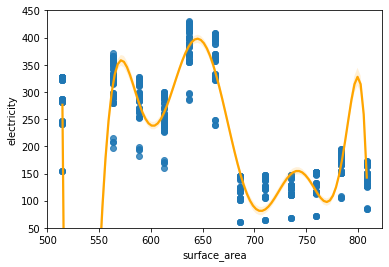

In [8]:
sns.regplot(x = 'surface_area', y = 'electricity', data = Elec,
            line_kws = {'color':'orange'},
            order = 9)
plt.ylim(50, 450)
plt.show()

> ## 5) 4개 모델 비교 시각화

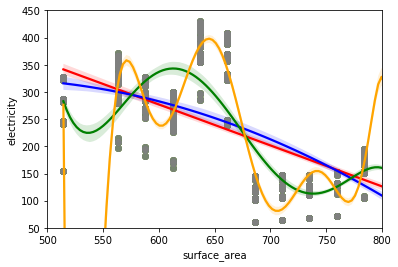

In [9]:
sns.regplot(x = 'surface_area', y = 'electricity', data = Elec, line_kws = {'color':'red'})
sns.regplot(x = 'surface_area', y = 'electricity', data = Elec, line_kws = {'color':'blue'}, order = 2)
sns.regplot(x = 'surface_area', y = 'electricity', data = Elec, line_kws = {'color':'green'}, order = 5)
sns.regplot(x = 'surface_area', y = 'electricity', data = Elec, line_kws = {'color':'orange'}, order = 9,
            scatter_kws = {"color":"gray"})
plt.ylim(50, 450)
plt.xlim(500, 800)
plt.show()

# II. Training Error
* import Packages

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

* pandas DataFrame

In [11]:
Elec = pd.read_csv('Electric.csv')

Elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
compactness                  768 non-null float64
surface_area                 768 non-null float64
wall_area                    768 non-null float64
roof_area                    768 non-null float64
height                       768 non-null float64
orientation                  768 non-null int64
glazing_area                 768 non-null float64
glazing_area_distribution    768 non-null int64
electricity                  768 non-null float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


> ## 1) 1차 모델 Training Error

* Reshape X_train & y_train

In [0]:
X_train = Elec.surface_area.values.reshape(-1, 1)
y_train = Elec.electricity.values.reshape(-1, 1)

* 모델 생성

In [13]:
from sklearn.linear_model import LinearRegression

Model_1 = LinearRegression()
Model_1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

* 모델 정보(학습결과) 확인

In [14]:
print(Model_1.intercept_)
print(Model_1.coef_)

[729.4538243]
[[-0.75387157]]


* y(실제값) 지정

In [15]:
y = Elec.electricity.values.reshape(-1, 1)

len(y)

768

* y_hat(예측값) 생성

In [16]:
y_hat_1 = Model_1.predict(y_train)

len(y_hat_1)

768

* MSE(Mean Squared Error) 계산

In [17]:
TR_Err_1 = np.mean((y - y_hat_1) ** 2)
TR_Err_1

145666.10303675922

> ## 2) 5차 모델 Training Error

* 모델 생성

In [0]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 5)
PX_5 = poly.fit_transform(X_train)

In [19]:
from sklearn.linear_model import LinearRegression

Model_5 = LinearRegression()
Model_5.fit(PX_5, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

* 모델 정보(학습결과) 확인

In [20]:
print(Model_5.intercept_)
print(Model_5.coef_)

[2906.21856216]
[[ 0.00000000e+00 -3.15247927e-04 -1.02929596e-01  3.78761358e-04
  -5.03206298e-07  2.29805893e-10]]


* y_hat(예측값) 생성

In [21]:
PX_5_pred = poly.fit_transform(X_train)

y_hat_5 = Model_5.predict(PX_5_pred)

len(y_hat_5)

768

* MSE(Mean Squared Error) 계산

In [22]:
TR_Err_5 = np.mean((y - y_hat_5) ** 2)
TR_Err_5

4177.726326929354

> ## 3) 9차 모델 Training Error

* 모델 생성

In [0]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 9)
PX_9 = poly.fit_transform(X_train)

In [24]:
from sklearn.linear_model import LinearRegression

Model_9 = LinearRegression()
Model_9.fit(PX_9, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

* 모델 정보(학습결과) 확인

In [25]:
print(Model_9.intercept_)
print(Model_9.coef_)

[-440.08258303]
[[ 0.00000000e+00  1.32186376e-17  2.84578331e-23  2.18958612e-20
   9.60688891e-18  3.17732640e-15  6.33669111e-13 -2.28805896e-15
   2.77514947e-18 -1.12710039e-21]]


* y_hat(예측값) 생성

In [26]:
PX_9_pred = poly.fit_transform(X_train)

y_hat_9 = Model_9.predict(PX_9_pred)

len(y_hat_9)

768

* MSE(Mean Squared Error) 계산

In [27]:
TR_Err_9 = np.mean((y - y_hat_9) ** 2)
TR_Err_9

4086.719990814486

> ## 4) 3개 모델 Training Error 비교

In [28]:
print('1차 모델 : ', TR_Err_1)
print('5차 모델 : ', TR_Err_5)
print('9차 모델 : ', TR_Err_9)

1차 모델 :  145666.10303675922
5차 모델 :  4177.726326929354
9차 모델 :  4086.719990814486


# III. Testing Error
* import Packages

In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

* pandas DataFrame

In [30]:
Elec = pd.read_csv('Electric.csv')

len(Elec)

768

> ## Train_Data vs. Test_Data

### (1) DataFram Split
* 8:2 Split(615:153)
* 80% Train_DF & 20% Test_DF

In [0]:
from sklearn.model_selection import train_test_split

TR_Elec, TE_Elec = train_test_split(Elec, test_size = int(len(Elec) * 0.2), random_state = 2045)

In [32]:
print(TR_Elec.shape, TE_Elec.shape)

(615, 9) (153, 9)


* 80% TR_Elec DataFrame

In [33]:
TR_Elec.head()

,compactness,surface_area,wall_area,roof_area,height,orientation,glazing_area,glazing_area_distribution,electricity
576,0.98,514.5,294.0,110.25,7.0,2,0.40,2,328.2
555,0.74,686.0,245.0,220.50,3.5,5,0.40,1,145.5
355,0.79,637.0,343.0,147.00,7.0,5,0.25,2,389.8
200,0.86,588.0,294.0,147.00,7.0,2,0.10,4,264.4
669,0.62,808.5,367.5,220.50,3.5,3,0.40,3,163.5


* 20% TE_Elec DataFrame

In [34]:
TE_Elec.head()

,compactness,surface_area,wall_area,roof_area,height,orientation,glazing_area,glazing_area_distribution,electricity
414,0.71,710.5,269.5,220.50,3.5,4,0.25,3,121.0
475,0.64,784.0,343.0,220.50,3.5,5,0.25,4,166.2
511,0.71,710.5,269.5,220.50,3.5,5,0.25,5,122.7
213,0.76,661.5,416.5,122.50,7.0,3,0.10,4,323.8
339,0.98,514.5,294.0,110.25,7.0,5,0.25,2,286.0


### (2) Array Split
* X_train, X_test & y_train, y_test

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Elec[['surface_area']], Elec['electricity'], 
                                                    test_size = int(len(Elec) * 0.2), random_state = 2045)

In [36]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(615, 1) (153, 1)
(615,) (153,)


* 80% X_train Array

In [37]:
X_train.head()

,surface_area
576,514.5
555,686.0
355,637.0
200,588.0
669,808.5


* 80% y_train Array

In [38]:
y_train.head()

576    328.2
555    145.5
355    389.8
200    264.4
669    163.5
Name: electricity, dtype: float64

> ## 1) 1차 모델 Testing Error

* Train_Data로 모델 생성

In [39]:
from sklearn.linear_model import LinearRegression

Model_1 = LinearRegression()
Model_1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

* Test_Data로 y_hat(예측값) 생성

In [40]:
y_hat_1 = Model_1.predict(X_test)
len(y_hat_1)

153

* Test_Data로 MSE(Mean Squared Error) 계산

In [41]:
from sklearn.metrics import mean_squared_error

TE_Err_1 = mean_squared_error(y_test, y_hat_1)
TE_Err_1

6083.275504632011

> ## 2) 5차 모델 Testing Error

* Train_Data로 모델 생성

In [0]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 5)
PX_5_TR = poly.fit_transform(X_train)

In [43]:
from sklearn.linear_model import LinearRegression

Model_5 = LinearRegression()
Model_5.fit(PX_5_TR, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

* Test_Data로 y_hat(예측값) 생성

In [0]:
PX_5_TE = poly.fit_transform(X_test)

y_hat_5 = Model_5.predict(PX_5_TE)

* Test_Data로 MSE(Mean Squared Error) 계산

In [45]:
from sklearn.metrics import mean_squared_error

TE_Err_5 = mean_squared_error(y_test, y_hat_5)
TE_Err_5

4335.140465070289

> ## 3) 9차 모델 Testing Error

* Train_Data로 모델 생성

In [0]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 9)
PX_9_TR = poly.fit_transform(X_train)

In [47]:
from sklearn.linear_model import LinearRegression

Model_9 = LinearRegression()
Model_9.fit(PX_9_TR, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

* Test_Data로 y_hat(예측값) 생성

In [0]:
PX_9_TE = poly.fit_transform(X_test)

y_hat_9 = Model_9.predict(PX_9_TE)

* Test_Data로 MSE(Mean Squared Error) 계산

In [49]:
from sklearn.metrics import mean_squared_error

TE_Err_9 = mean_squared_error(y_test, y_hat_9)
TE_Err_9

4232.768489928012

> ## 4) 3개 모델 Testing Error 비교

In [50]:
print('1차 모델 : ', TE_Err_1)
print('5차 모델 : ', TE_Err_5)
print('9차 모델 : ', TE_Err_9)

1차 모델 :  6083.275504632011
5차 모델 :  4335.140465070289
9차 모델 :  4232.768489928012


# IV. Vlidation Approach
* import Packages

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

* pandas DataFrame

In [52]:
CARS = pd.read_csv('Cars.csv')

CARS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null int64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


* 산점도(weight vs. mpg)

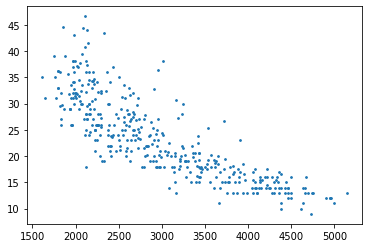

In [53]:
plt.scatter(CARS.weight, CARS.mpg, s = 3)
plt.show()

> ## Train vs. Validation vs. Test
* 6:2:2 Split(236:78:78)

> ## sklearn Package 사용
* train_test_split( )

* 20% Test_Data(78)

In [54]:
from sklearn.model_selection import train_test_split

X_remain, X_test, y_remain, y_test = train_test_split(CARS[['weight']], CARS['mpg'], 
                                                      test_size = int(len(CARS) * 0.2), random_state = 2045)

print(X_remain.shape, y_remain.shape)
print(X_test.shape, y_test.shape)

(314, 1) (314,)
(78, 1) (78,)


* 60% Train_Data(236) & 20% Validation_Data(78)

In [55]:
X_train, X_valid, y_train, y_valid = train_test_split(X_remain, y_remain, 
                                                      test_size = int(len(CARS) * 0.2), random_state = 2045)

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)

(236, 1) (236,)
(78, 1) (78,)


> ## 1) 1차 모델 Validation Error

* Train_Data로 모델 생성

In [56]:
from sklearn.linear_model import LinearRegression

Model_1 = LinearRegression()
Model_1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

* Validation_Data로 y_hat(예측값) 생성 및 MSE 계산

In [57]:
from sklearn.metrics import mean_squared_error

MSE_1 = mean_squared_error(y_valid, Model_1.predict(X_valid))
MSE_1

17.323857716497056

> ## 2) 9차 모델 Validation Error

* Train_Data로 모델 생성

In [58]:
poly = PolynomialFeatures(degree = 9)
PX_9_TR = poly.fit_transform(X_train)

Model_9 = LinearRegression()
Model_9.fit(PX_9_TR, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

* Validation_Data로 y_hat(예측값) 생성 및 MSE 계산

In [59]:
from sklearn.metrics import mean_squared_error

PX9_valid = poly.fit_transform(X_valid)

MSE_9 = mean_squared_error(y_valid, Model_9.predict(PX9_valid))
MSE_9

16.276374329837978

> ## 3) 2개 모델 Validation Error 비교

In [60]:
print('1차 모델 MSE_1  : ', MSE_1)
print('9차 모델 MSE_9  : ', MSE_9)

1차 모델 MSE_1  :  17.323857716497056
9차 모델 MSE_9  :  16.276374329837978


> ## 4) 최종 9차 모델을 Test_Data에 적용

* Test_Data로 y_hat(예측값) 생성 및 MSE 계산

In [61]:
PX9_TE = poly.fit_transform(X_test)

mean_squared_error(y_test, Model_9.predict(PX9_TE))

9.260029888421302

# 
# 
# 
# The End
# 
# 
# 